In [22]:
# importing packages 'pandas'

import pandas as pd
from datetime import datetime

In [23]:
# import 'Netflix Entertainment Dataset'

netflix0 = pd.read_csv("netflix_titles.csv")
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
netflix0.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


# Beginning of  Data Wrangling

In [24]:
# Drop empty fields

netflix0.dropna()
netflix0.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


In [25]:
# Subset Netflix dataset

netflix0 = netflix0[['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'listed_in']]
netflix0.head(1)

,show_id,type,title,country,date_added,release_year,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",9-Sep-19,2019,"Children & Family Movies, Comedies"


In [26]:
# Recode 'Type' column

def stream(series): 
    if series == "Movie":
        return "Movie"
    if series == "TV Show": 
        return "TV_Show"
    
netflix0['StreamR'] = netflix0['type'].apply(stream)
netflix0.head(1)

,show_id,type,title,country,date_added,release_year,listed_in,StreamR
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",9-Sep-19,2019,"Children & Family Movies, Comedies",Movie


In [27]:
# Drop the orginal 'type' column.

netflix0.drop(["type"], axis = 1, inplace = True)
netflix0.head(1)

,show_id,title,country,date_added,release_year,listed_in,StreamR
0,81145628,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",9-Sep-19,2019,"Children & Family Movies, Comedies",Movie


In [28]:
# Value_counts() function to sum total TV_Shows and Movies

netflix0.StreamR.value_counts()
netflix0.StreamR.value_counts()

Movie      4265
TV_Show    1969
Name: StreamR, dtype: int64

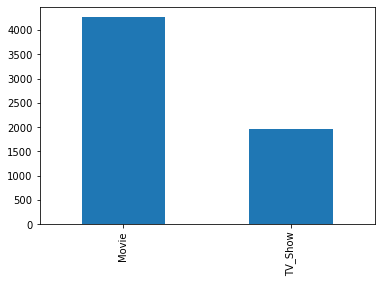

In [29]:
# Bar graph displays the TV_Shows and Movies totals 

netflix0['StreamR'].value_counts().plot(kind = 'bar')

In a 12 year time span, Netflix added more Moives streaming content then TV_Shows.

In [30]:
# Re-arrange dataset columns

netflix1 = netflix0[['show_id', 'title', 'StreamR', 'listed_in', 'date_added', 'release_year', 'country']]
netflix1.head(1)

,show_id,title,StreamR,listed_in,date_added,release_year,country
0,81145628,Norm of the North: King Sized Adventure,Movie,"Children & Family Movies, Comedies",9-Sep-19,2019,"United States, India, South Korea, China"


In [31]:
# Date_added column: set as date type

print(netflix1.dtypes)

show_id          int64
title           object
StreamR         object
listed_in       object
date_added      object
release_year     int64
country         object
dtype: object


In [33]:
# converting the string to datetime format 

netflix1['date_added'] = netflix1['date_added'].apply(lambda date: pd.to_datetime(date, dayfirst = True)) 
netflix1.head(1)

,show_id,title,StreamR,listed_in,date_added,release_year,country
0,81145628,Norm of the North: King Sized Adventure,Movie,"Children & Family Movies, Comedies",2019-09-09,2019,"United States, India, South Korea, China"


In [15]:
# Exporting dataframe: netflix1 to an csv file.

netflix1.to_csv("netflix1.csv", index = False) #Python